In [ ]:
import pandas as pd;
import numpy as np;
from sklearn.preprocessing import OrdinalEncoder, StandardScaler;
from sklearn.model_selection import train_test_split;
import seaborn as sns;
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping;
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.feature_selection import f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
df = pd.read_csv("sonardataset.csv")
print(df.shape)
df.head()

(208, 61)


,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [ ]:
df["Y"].unique()

array(['R', 'M'], dtype=object)

# 1. EDA and Data Processing

In [ ]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
       ..
x_57    0
x_58    0
x_59    0
x_60    0
Y       0
Length: 61, dtype: int64


In [ ]:
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
'''
1. Encoding the target columns

'''
df["Y"] = [0 if val == "R" else 1 for val in df["Y"]]

In [ ]:
'''
2. Data Splitting
'''

features = df.drop(columns = ["Y"])
target = df["Y"]

['x_16', 'x_17', 'x_18', 'x_25', 'x_26', 'x_29', 'x_30', 'x_38', 'x_40', 'x_41', 'x_57']


<Axes: >

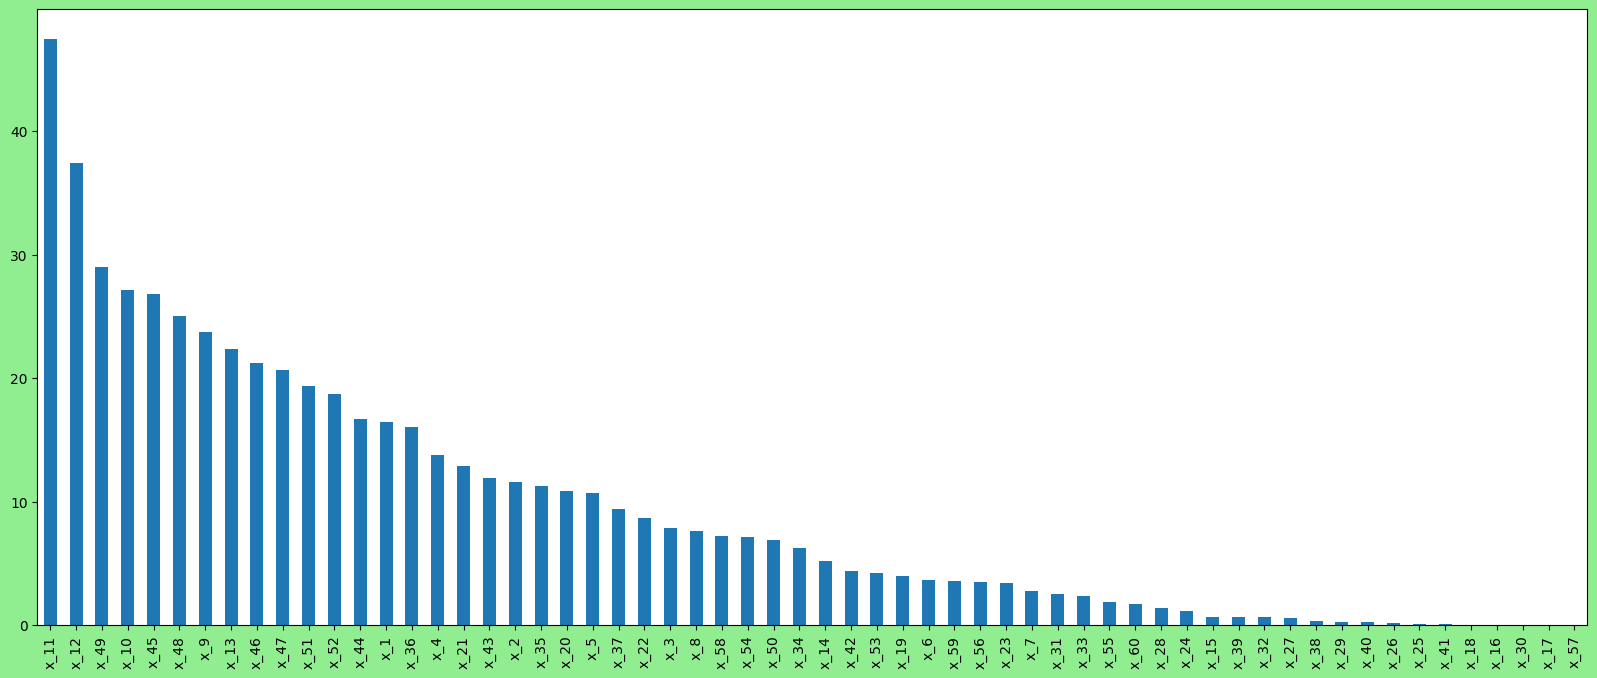

In [ ]:
'''
3. Detecting Correlation and Multicollinearity
'''

f_class = f_classif(features,target)
l1 = [features.columns[i] if f_class[0][i] < 0.5 else None for i, feat in enumerate(f_class[0])]
low_correlation_features = list(filter(lambda x: x is not None, l1))
print(low_correlation_features)

plt.figure(figsize=(20,8), facecolor="lightgreen")
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')

In [ ]:
features.drop(columns=low_correlation_features, inplace=True)

In [ ]:
vif = pd.DataFrame()
vif["Features"] = features.columns
vif["VIF_SCORES"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

vif.sort_values(ascending=False, by="VIF_SCORES")

,Features,VIF_SCORES
18,x_22,181.039268
17,x_21,178.515190
19,x_23,153.168651
16,x_20,136.579135
26,x_34,77.316275
25,x_33,70.368128
27,x_35,70.018108
10,x_11,67.318550
28,x_36,67.056505
20,x_24,65.044109


In [ ]:
high_vif_features = [vif["Features"][i] for i, score in enumerate(vif["VIF_SCORES"]) if score > 10]
print(len(high_vif_features))
print(len(features.columns))

38
49


In [ ]:
features.drop(columns=high_vif_features, inplace=True)
print(len(features.columns))

11


In [ ]:
features.head()

,x_1,x_39,x_51,x_52,x_53,x_54,x_55,x_56,x_58,x_59,x_60
0,0.0200,0.4943,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0084,0.0090,0.0032
1,0.0453,0.1840,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0049,0.0052,0.0044
2,0.0262,0.5375,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0164,0.0095,0.0078
3,0.0100,0.9857,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0044,0.0040,0.0117
4,0.0762,0.2828,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0048,0.0107,0.0094


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(166, 11)
(42, 11)
(166,)
(42,)


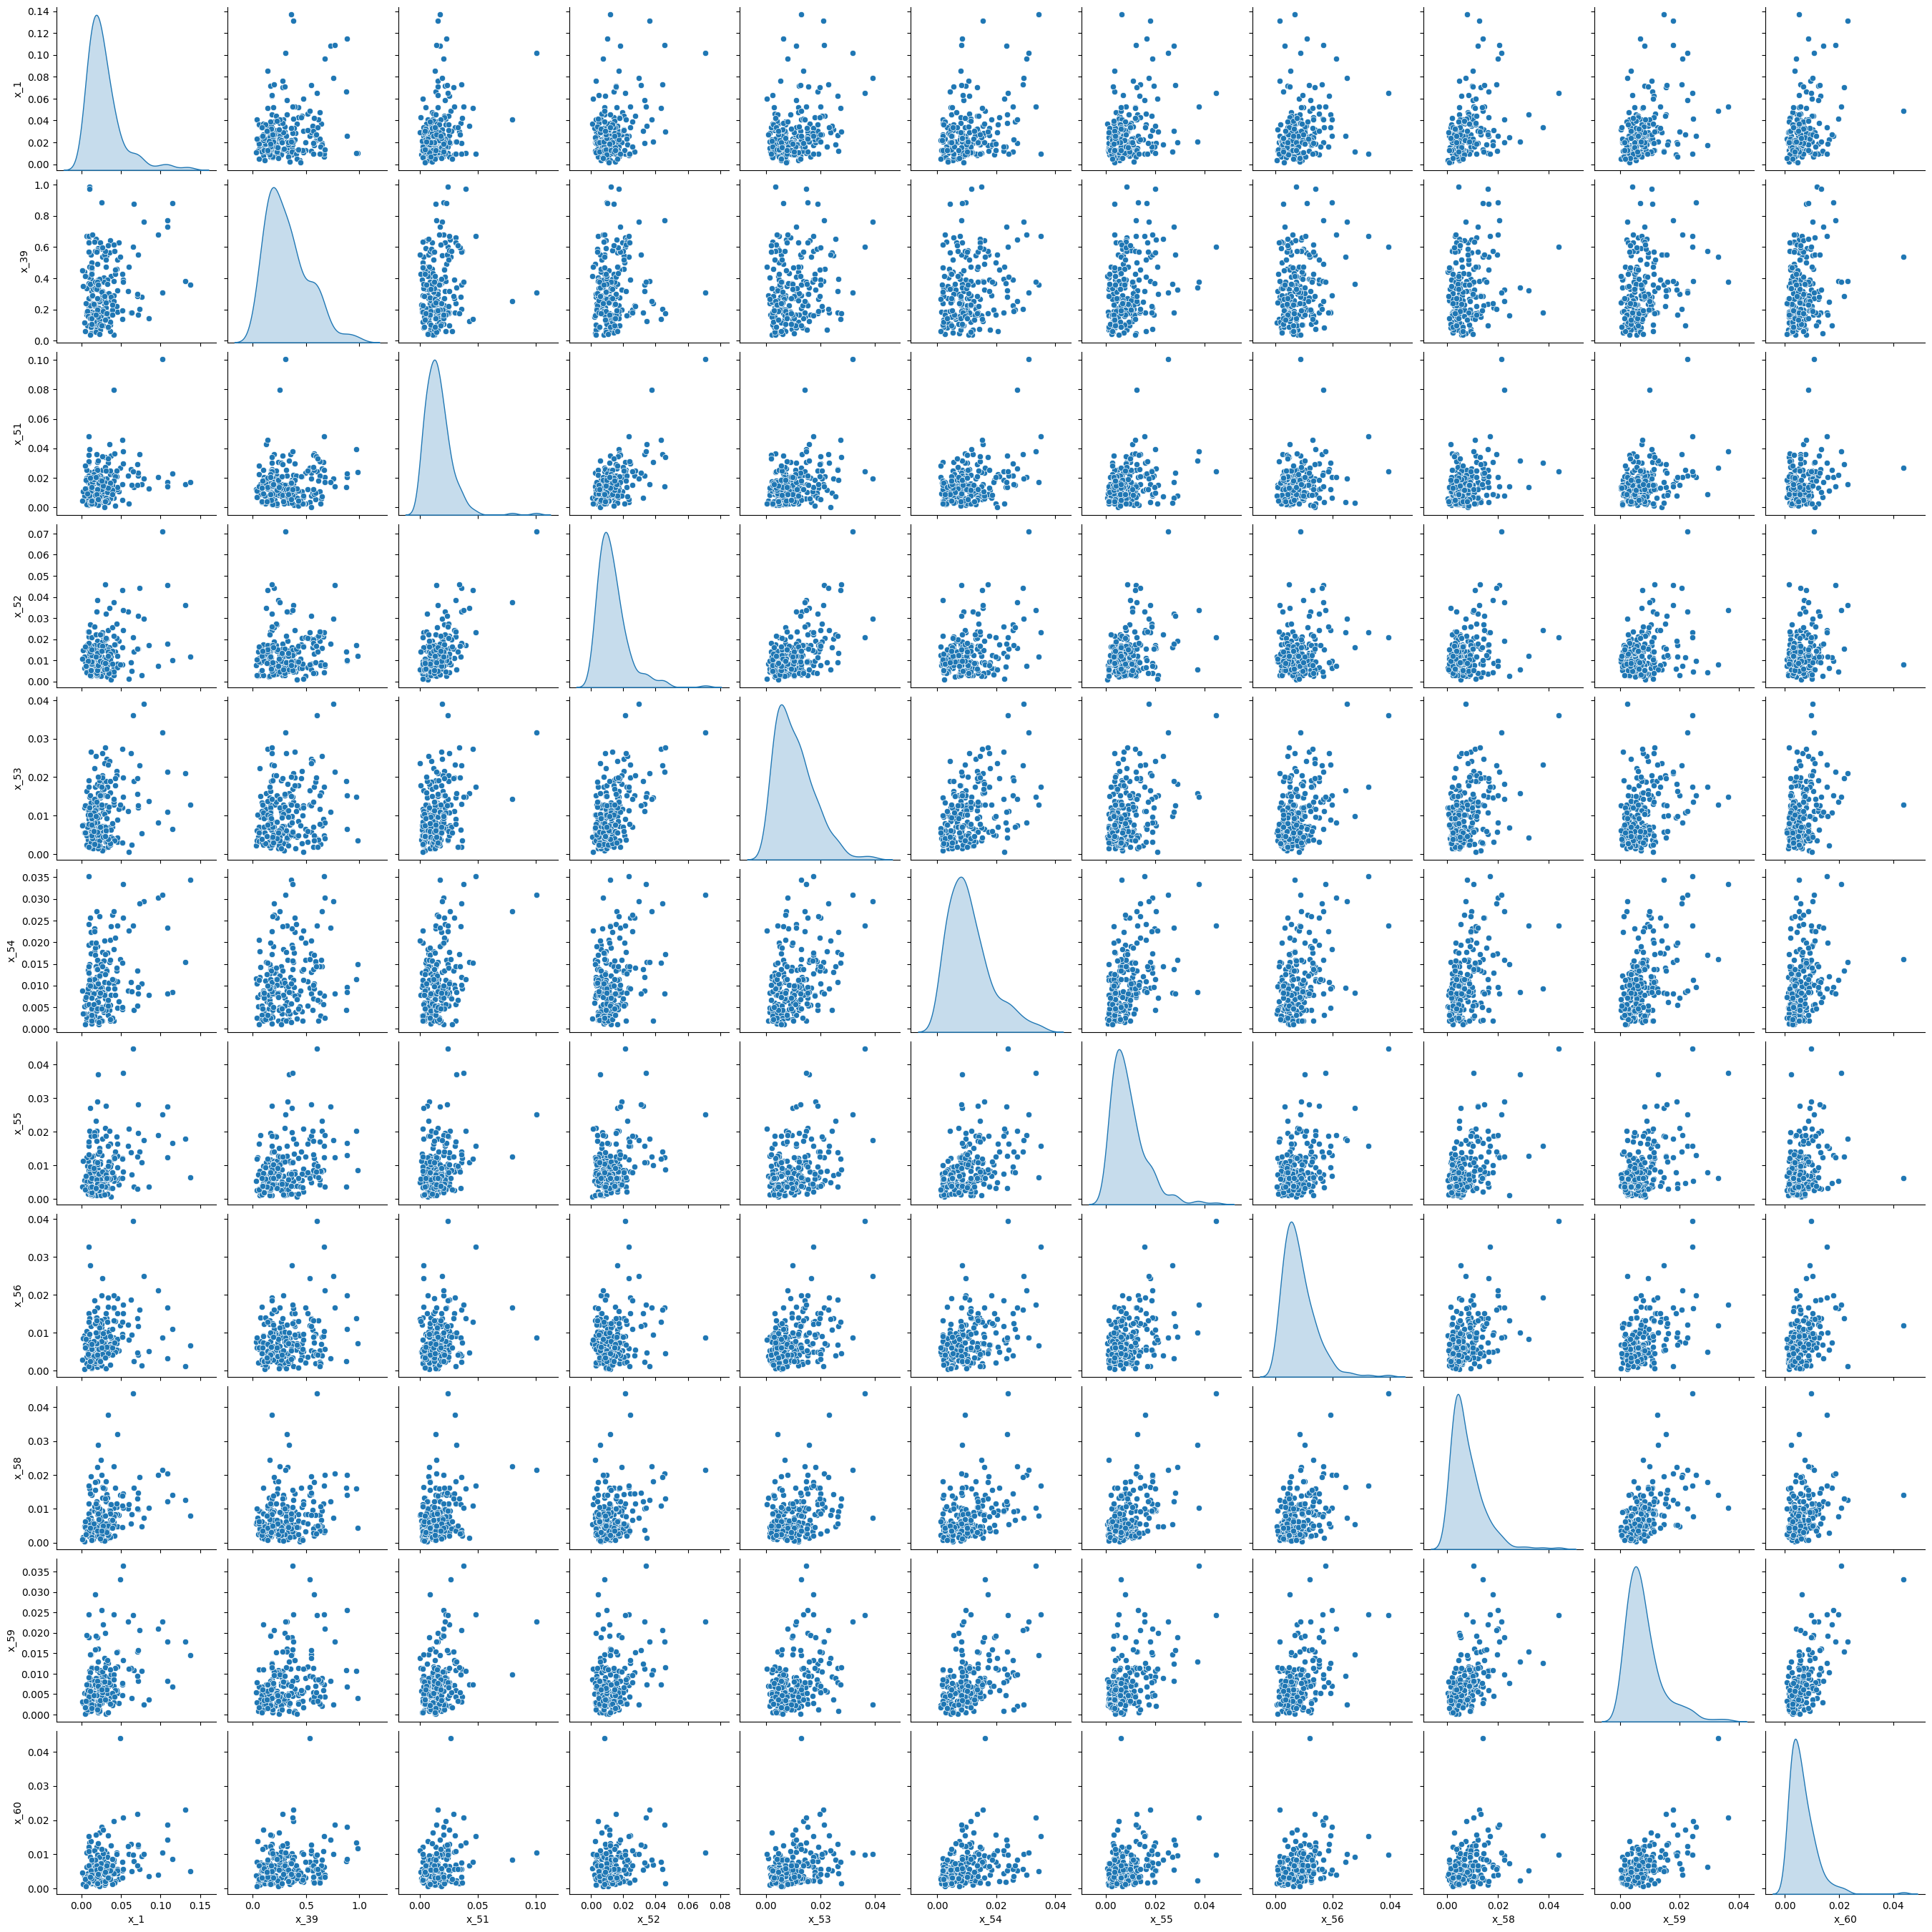

In [ ]:
sns.pairplot(features, diag_kind="kde")


# 2. Data Transforming

In [ ]:
'''
Since the ouput is going to be sigmoid values for 0 and 1, we need to transform the output to a similar value.

for 1 -> [0,1]
for 0 -> [1,0]
'''

y_train= tf.keras.utils.to_categorical(y_train)
y_test= tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

# 3. Model Building

In [ ]:
'''
1. Simple Perceptron
'''

simple_perc= tf.keras.models.Sequential()

In [ ]:
x_train.head()

,x_1,x_39,x_51,x_52,x_53,x_54,x_55,x_56,x_58,x_59,x_60
127,0.0209,0.3391,0.0316,0.0057,0.0159,0.0085,0.0372,0.0101,0.0288,0.0129,0.0023
85,0.0365,0.0612,0.0223,0.0110,0.0071,0.0205,0.0164,0.0063,0.0094,0.0110,0.0068
32,0.0195,0.6475,0.0261,0.0157,0.0074,0.0271,0.0203,0.0089,0.0095,0.0021,0.0053
201,0.0335,0.0894,0.0130,0.0120,0.0039,0.0053,0.0062,0.0046,0.0022,0.0005,0.0031
26,0.0151,0.2405,0.0086,0.0061,0.0015,0.0084,0.0128,0.0054,0.0019,0.0023,0.0062


In [ ]:
'''
Input layer and Output layer
'''
simple_perc.add(tf.keras.layers.Dense(units=2,activation="sigmoid",input_shape=[11]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


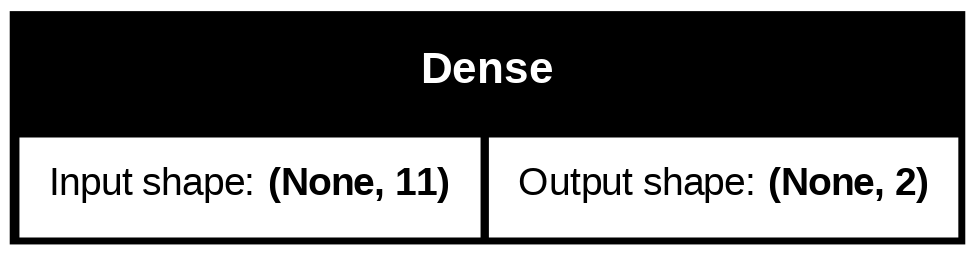

In [ ]:
plot_model(simple_perc,show_shapes=True)

In [ ]:
'''
Compiling the model
'''

simple_perc.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                    loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
'''
Adding Earlystopping to reduce overfitting
'''

early= EarlyStopping(monitor='val_accuracy',patience=5)

In [ ]:
x_train.shape

(166, 11)

In [ ]:
'''
Training the model
'''

trained_simple_perc = simple_perc.fit(x_train,y_train,epochs=50,batch_size=50,
                         validation_data=(x_test,y_test),callbacks=[early])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6115 - loss: 0.6913 - val_accuracy: 0.7381 - val_loss: 0.6882
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6315 - loss: 0.6907 - val_accuracy: 0.7381 - val_loss: 0.6882
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6177 - loss: 0.6914 - val_accuracy: 0.7381 - val_loss: 0.6884
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6339 - loss: 0.6907 - val_accuracy: 0.7381 - val_loss: 0.6884
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6613 - loss: 0.6903 - val_accuracy: 0.7381 - val_loss: 0.6882
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6233 - loss: 0.6908 - val_accuracy: 0.7619 - val_loss: 0.6881
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6389 - loss: 0.6906 - val_accuracy: 0.7619 - val_loss: 0.6879
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5951 - loss: 0.6908 - val_accuracy: 0.7381 - val_loss: 0.6878


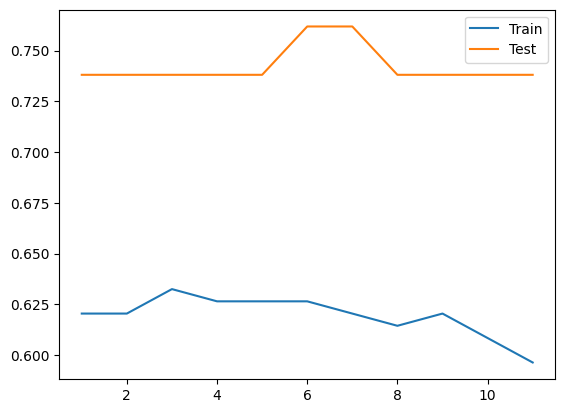

In [ ]:
last_index = trained_simple_perc.epoch[-1] + 2
plt.plot(range(1,last_index),trained_simple_perc.history['accuracy'],label='Train')
plt.plot(range(1,last_index),trained_simple_perc.history['val_accuracy'],label='Test')
plt.legend()

In [ ]:
val_loss, val_accuracy=simple_perc.evaluate(x_test,y_test)
print('val_loss:',val_loss,',','val_accuracy:',val_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7316 - loss: 0.6877
val_loss: 0.687508225440979 , val_accuracy: 0.738095223903656


In [ ]:
'''
ANN (Multi Layer)
'''

ann= tf.keras.models.Sequential()

In [ ]:
'''
First Hidden layer and Input layer
'''
first_hidden_layer=round((11*(2/3))+2)
second_hidden_layer=round((first_hidden_layer*(2/3))+2)
print(first_hidden_layer)
print(second_hidden_layer)

9
8


In [ ]:
ann.add(tf.keras.layers.Dense(units = 9,activation ="relu",input_shape = [11]))
ann.add(tf.keras.layers.Dense(units = 8,activation ='relu'))
ann.add(tf.keras.layers.Dense(units = 2,activation ='sigmoid'))
ann.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 9)              │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206 (824.00 B)

 Trainable params: 206 (824.00 B)

 Non-trainable params: 0 (0.00 B)

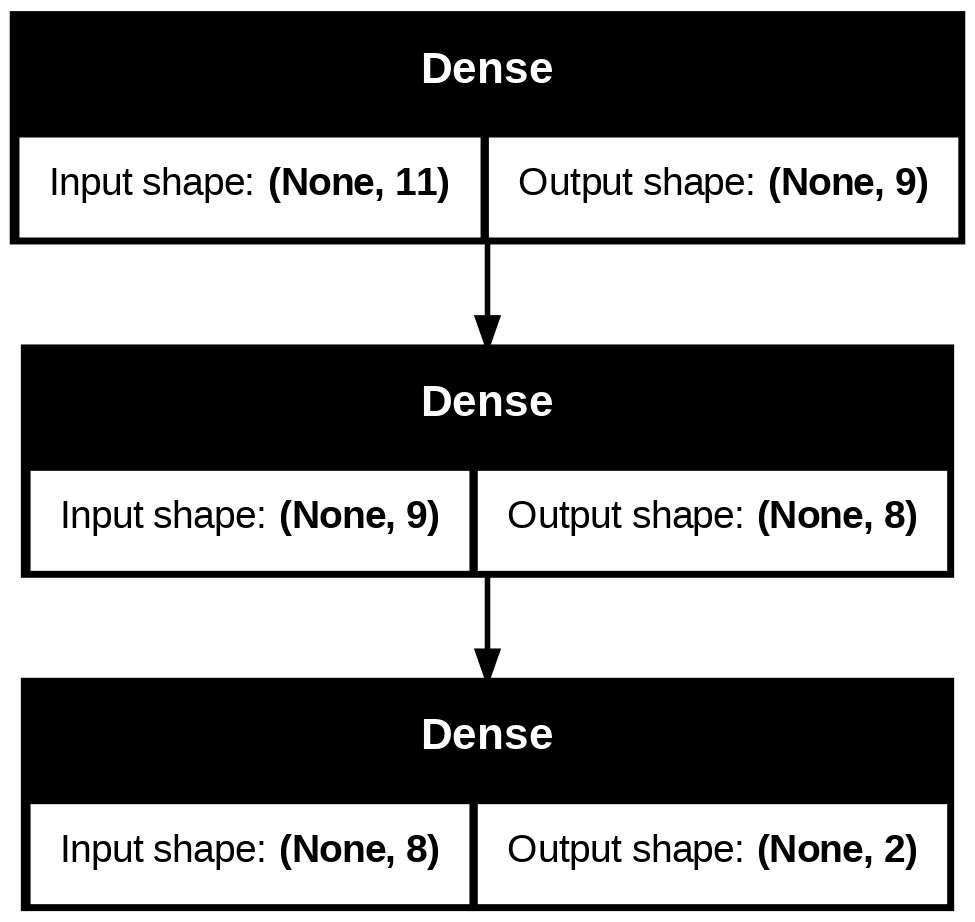

In [ ]:
plot_model(ann,show_shapes=True)

In [ ]:
'''
Compiling the model
'''

ann.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss= tf.keras.losses.binary_focal_crossentropy,
    metrics=['accuracy']
    )

In [ ]:
'''
Training the model
'''


trained_multi_layer = ann.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=1000,
    validation_data=(x_test,y_test),
    callbacks=[early]
    )

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.1734 - val_accuracy: 0.3095 - val_loss: 0.1745
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5120 - loss: 0.1734 - val_accuracy: 0.2619 - val_loss: 0.1744
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4699 - loss: 0.1734 - val_accuracy: 0.2857 - val_loss: 0.1742
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4699 - loss: 0.1733 - val_accuracy: 0.3095 - val_loss: 0.1741
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4880 - loss: 0.1733 - val_accuracy: 0.3333 - val_loss: 0.1740
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5181 - loss: 0.1733 - val_accuracy: 0.3333 - val_loss: 0.1738
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5060 - loss: 0.1733 - val_accuracy: 0.3571 - val_loss: 0.1737
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5120 - loss: 0.1733 - val_accuracy: 0.3810 - val_loss: 0.1736
E

In [ ]:
val_loss, val_accuracy=ann.evaluate(x_test,y_test)
print('val_loss:',val_loss,',','val_accuracy:',val_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6002 - loss: 0.1731
val_loss: 0.17304876446723938 , val_accuracy: 0.6190476417541504


In [ ]:
trained_multi_layer.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

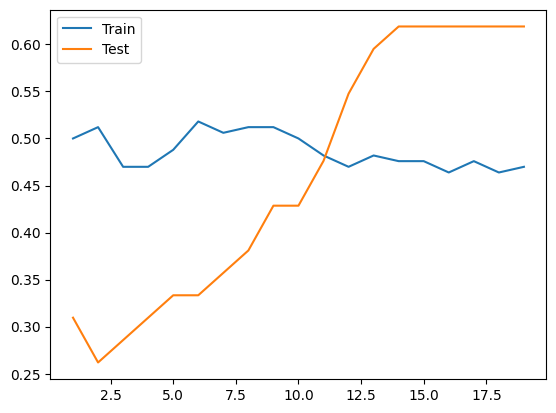

In [ ]:
last_index = trained_multi_layer.epoch[-1] + 2
plt.plot(range(1,last_index),trained_multi_layer.history['accuracy'],label='Train')
plt.plot(range(1,last_index),trained_multi_layer.history['val_accuracy'],label='Test')
plt.legend()

# 4. Checking the Accuracy Scores

In [ ]:
y_pred_simple_perc = simple_perc.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


In [ ]:
act=[]
pred=[]
for i in range(len(y_test)):
  act.append(np.argmax(y_test[i]))
for j in range(len(y_pred_simple_perc)):
  pred.append(np.argmax(y_pred_simple_perc[j]))
print(act)
print(pred)

[np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0)]
[np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1

In [ ]:
accuracy_score(act,pred)

0.7380952380952381

In [ ]:
print(classification_report(act,pred))

              precision    recall  f1-score   support

           0       0.71      0.36      0.48        14
           1       0.74      0.93      0.83        28

    accuracy                           0.74        42
   macro avg       0.73      0.64      0.65        42
weighted avg       0.73      0.74      0.71        42



In [ ]:
y_pred_ann =ann.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
act=[]
pred=[]
for i in range(len(y_test)):
  act.append(np.argmax(y_test[i]))
for j in range(len(y_pred_ann)):
  pred.append(np.argmax(y_pred_ann[j]))
print(act)
print(pred)

[np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0)]
[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1

In [ ]:
accuracy_score(act,pred)

0.6190476190476191

In [ ]:
print(classification_report(act,pred))

              precision    recall  f1-score   support

           0       0.42      0.36      0.38        14
           1       0.70      0.75      0.72        28

    accuracy                           0.62        42
   macro avg       0.56      0.55      0.55        42
weighted avg       0.61      0.62      0.61        42

